In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/programming-language-popularity/QueryResults.csv


# Analyse the Popularity of Different Programming Languages over Time

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about? 



StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

To figure out which language is the most popular, all we need to do is count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!

Today you will learn:

* How to visualise your data and create charts with Matplotlib

* How to pivot, group and manipulate your data with Pandas to get it into the format you want

* How to work with timestamps and time-series data

* How to style and customise a line chart to your liking



Without further ado, let's get started!

**Import the Data**

In this lesson, I've also included a QueryResults.csv file with the Stack Overflow data that we'll be using. Download this .csv and add it to your notebook.

Get the Data¶
Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from StackExchange to get your own .csv file

* select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
* from PostTags pt
* join Posts q on q.Id=pt.PostId
* join Tags t on t.Id=pt.TagId
* where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
* and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
* group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
* order by dateadd(month, datediff(month, 0, q.CreationDate), 0)

**Challenge**


For the next steps, let's review the data exploration that we've done yesterday:

* Read the .csv file and store it in a Pandas DataFrame called df. Have a look at the read_csv() documentation and try to provide these column names: `['DATE', 'TAG', 'POSTS']`

* Look at the first and last 5 rows of the DataFrame.

* How many rows and how many columns does it have?

* Count the number of entries in each column.

I hope the last steps were fairly straightforward. First, we import pandas and then we can call read_csv(), where we can provide some additional arguments, like the names for our columns.

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe and provide these column names: `['DATE', 'TAG', 'POSTS']`

In [3]:
df = pd.read_csv("../input/programming-language-popularity/QueryResults.csv", 
                names = ['DATE', 'TAG','POSTS'], header=0)

Setting the header row to 0 allows us to substitute our own column names.

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

Next, we use `.head() `and `.tail()` to look at the first and last 5 rows. This allows us to verify that our column naming worked as intended.

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

To check the dimensions of the DataFrame, we use our old friend `.shape`. This tells us we have 1991 rows and 3 columns.

In [6]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

To count the number of entries in each column we can use `.count()`. Note that .count() will actually tell us the number of non-NaN values in each column.

In [7]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Next Challenge**


The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

Also, some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

In order to look at the number of entries and the number of posts by programming language, we need to make use of the `.groupby()` method. The key is combining `.groupby()` with the TAG column, which holds as our categories (the names of the programming languages).

If we `.sum() `the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


If we `.count()` the entries in each column, we can see how many months of entries exist per programming language.

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 

In [9]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

**Selecting an Individual Cell**

Let's take a closer look at the 'DATE' column in our DataFrame. We can use the double square bracket notation to look at the second entry in the column: 

`df['DATE'][1]`

Alternatively, for column names no spaces, we can also use the dot-notation:

`df.DATE[1]`

I prefer the square bracket notation for column names since it's more flexible, but with the dot notation, you get to use autocomplete, which is also nice.

In [10]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [11]:
df.DATE[1]

'2008-08-01 00:00:00'

**Inspecting the Data Type**

When we type check the contents of this cell, we see that we are not dealing with a date object, but rather with a string.


In [12]:
type(df['DATE'][1])

str

This is not very handy. Not only will the string format always show the unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times. Pandas can help us convert the string to a timestamp using the `to_datetime()` method.

Here's how we can convert the entry in our cell and check that it worked:

In [13]:
pd.to_datetime(df.DATE[1])

Timestamp('2008-08-01 00:00:00')

In [14]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

Let's use Pandas' `to_datetime()` to convert the entire `df['DATE'] `column.

Excellent. Now we can start thinking about how to manipulate our data so that we get a one column per programming language. For all of that and more, I'll see you in the next lesson

## Data Manipulation

**The `.pivot()` method**

Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor, where each row is the Age of the actor:

How would you do this with the DataFrame below?

In [15]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


The easiest way to accomplish this is by using the `.pivot()` method in Pandas. Try the example for yourself. The thing to understand is how to supply the correct aguments to get the desired outcome. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells. 

In [16]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


However, there's one very important thing to notice. What happens if a value is missing? In the example above there's no value for old Sylvester. In this case, the .pivot() method will insert a NaN value.

**Mini-Challenge**

* Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

* Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

* Examine the head and the tail of the DataFrame. What does it look like?

* Print out the column names.

* Count the number of entries per column.

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [18]:
reshaped_df.shape

(145, 14)

In [19]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

We have 145 rows and 14 columns in the new DataFrame. Each programming language became a column and our date column became the new index (i.e., the label for the rows).

When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

**Dealing with NaN Values**

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the `.fillna()` method.

In [21]:
reshaped_df.fillna(0, inplace=True)

The `inplace` argument means that we are updating `reshaped_df`. Without this argument we would have to write something like this:

In [22]:
reshaped_df = reshaped_df.fillna(0) 

In [23]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


We can also check if there are any NaN values left in the entire DataFrame with this line:

In [24]:
reshaped_df.isna().values.any()

False

Here we are using the `.isna() `method that we've used before, but we're chaining two more things: the values attribute and the `any()` method. This means we don't have to search through the entire DataFrame to spot if `.isna()` is True.

In [25]:
reshaped_df.isna().values.any()

False

Now we're all set to create some charts and visualise our data. For all of that and more, I'll see you in the next lesson!

## Data Visualisaton with with Matplotlib

To create our first charts we're going to use a library called Matplotlib. There are many different libraries in Python to help us create charts and graphs. Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas, so let's check it out.

In [26]:
import matplotlib.pyplot as plt

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

**Mini Challenge**

You can actually show a line chart for the popularity of a programming language using only a single line of code. Can you use the `.plot()` documentation to figure out how to do this? Try and plot the popularity of the Java programming language.

All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart. The x-values are our dates and the y-values are the number of posts. We can supply these values to the .plot() function by position like so:

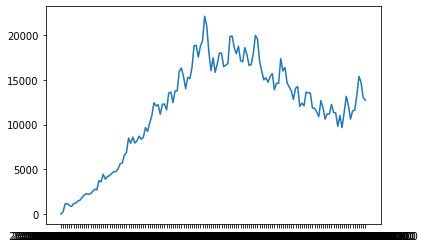

In [27]:
plt.plot(reshaped_df.index, reshaped_df.java)

or like so if you prefer the square bracket notation.

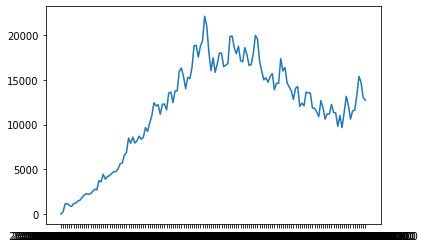

In [28]:
plt.plot(reshaped_df.index, reshaped_df['java'])

**Styling the Chart**

Let's look at a couple of methods that will help us style our chart:

* `.figure()` - allows us to resize our chart

* `.xticks()` - configures our x-axis

* `.yticks()` - configures our y-axis

* `.xlabel()` - add text to the x-axis

* `.ylabel()` - add text to the y-axis

* `.ylim()` - allows us to set a lower and upper bound


To make our chart larger we can provide a width (16) and a height (10) as the `figsize` of the figure.

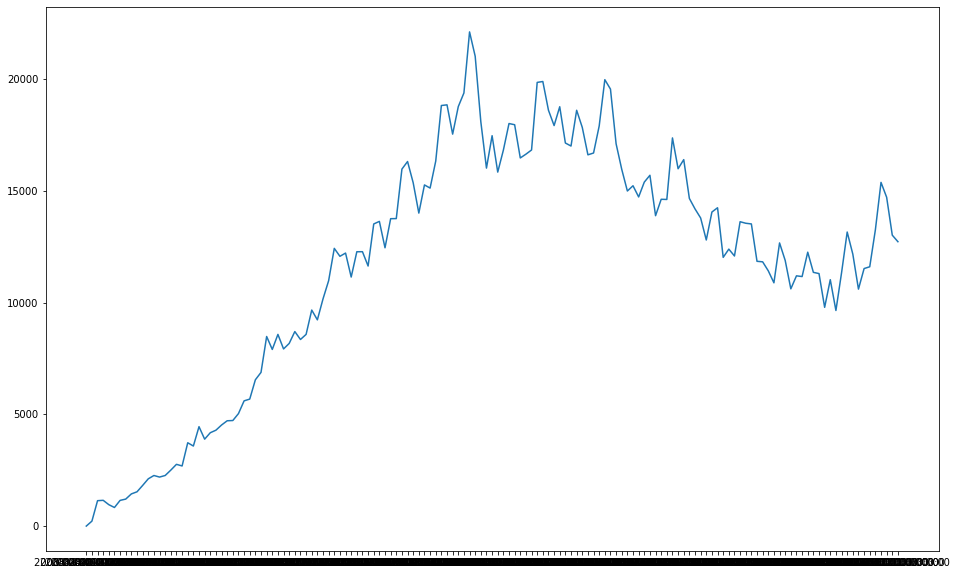

In [29]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:

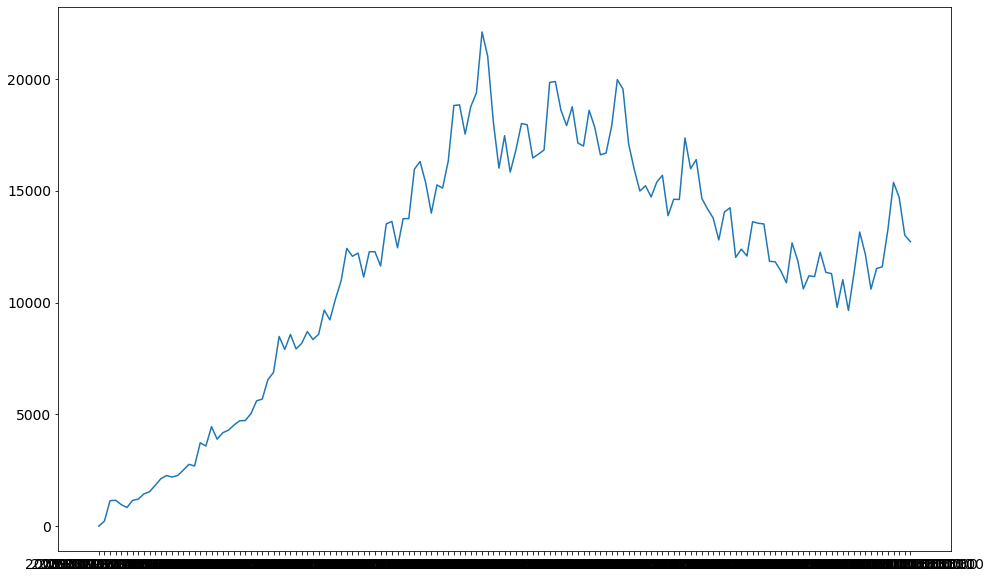

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with `.ylim()`.

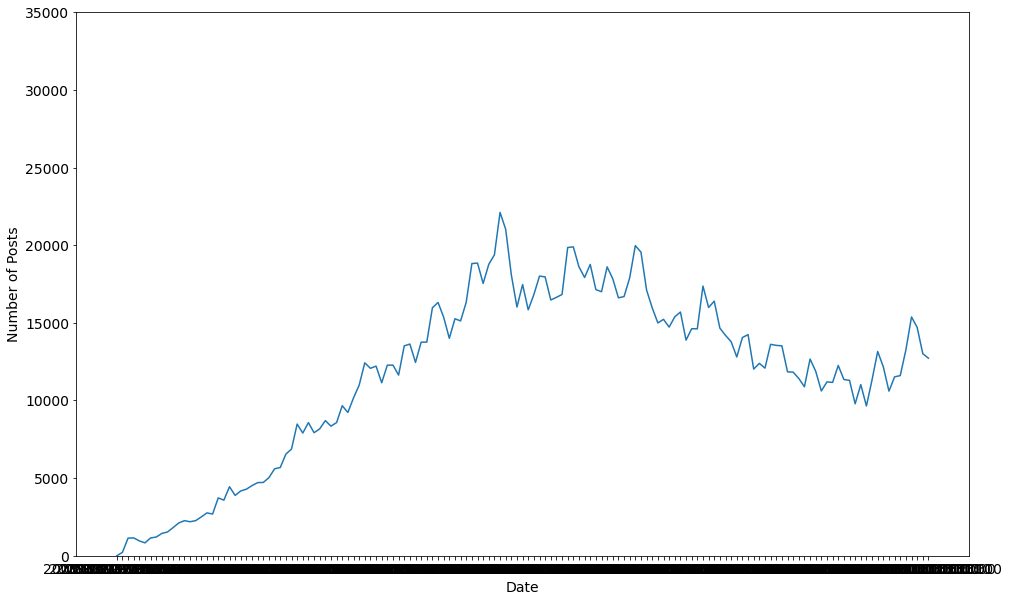

In [31]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

Now that you've successfully created and styled your chart, can you figure out how to plot both Java and Python next to each other? The result should look something like this:

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

The trick is simply calling the `.plot()` method twice. That's all there is to it! =)

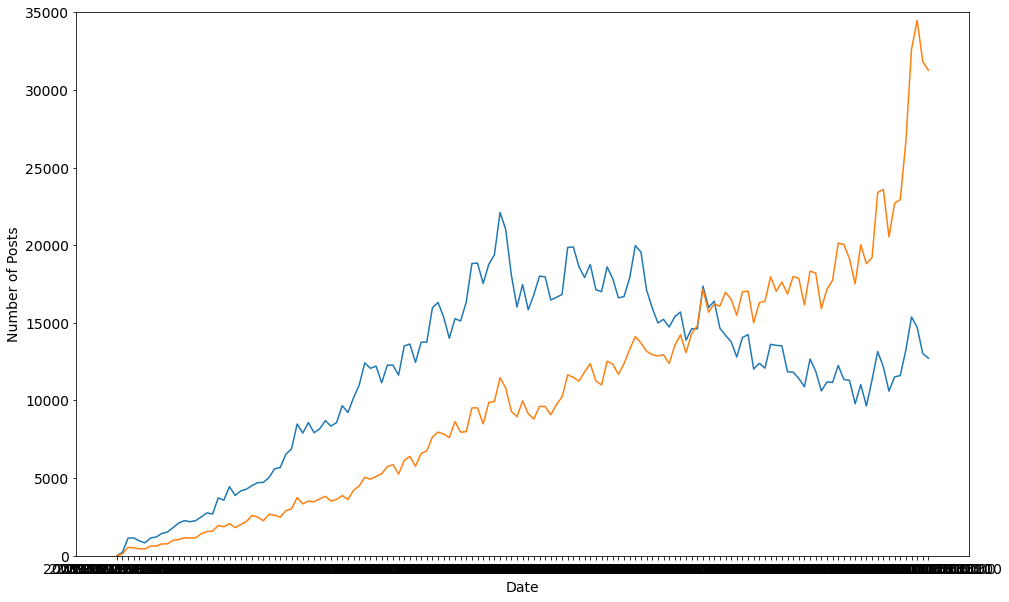

In [32]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python) # Tadah

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

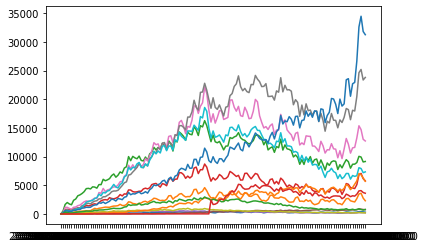

In [33]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

This will allow us to iterate over each column in the DataFrame and plot it on our chart. The final result should look like this:

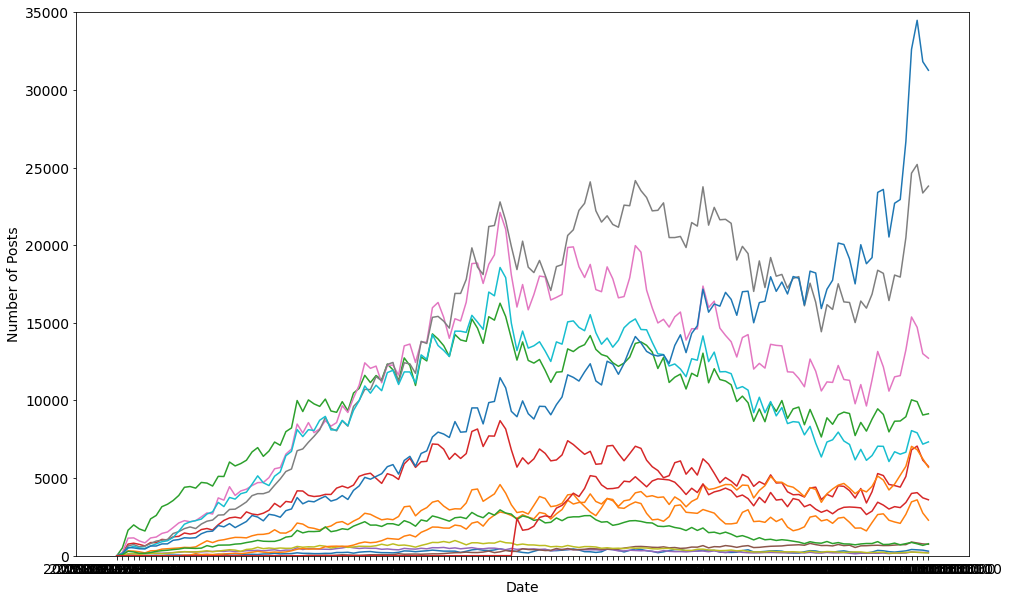

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

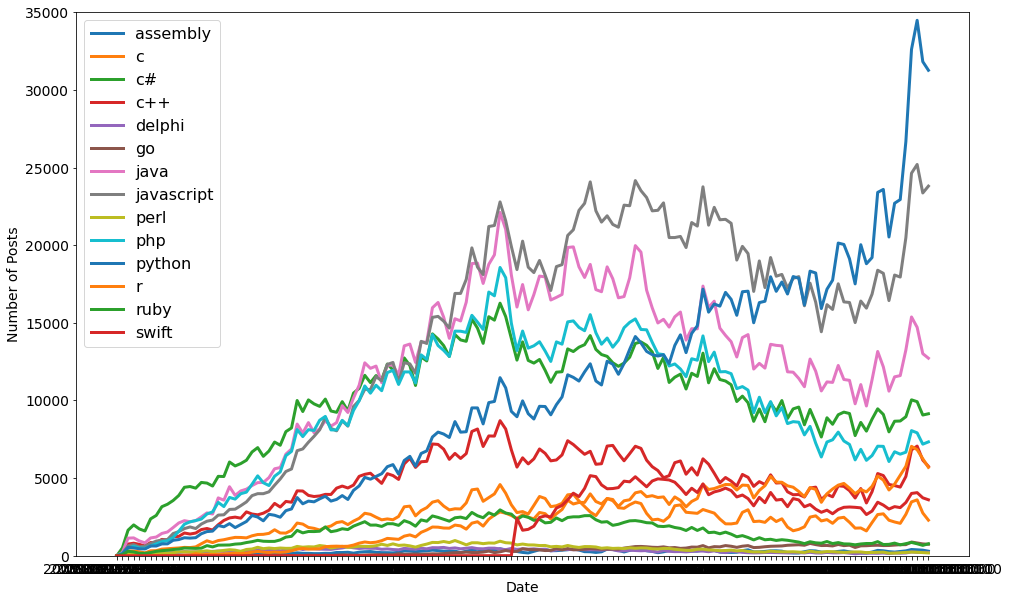

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16) 

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: `rolling()` and `mean()`. We can chain these two methods up to create a DataFrame made up of the averaged observations.

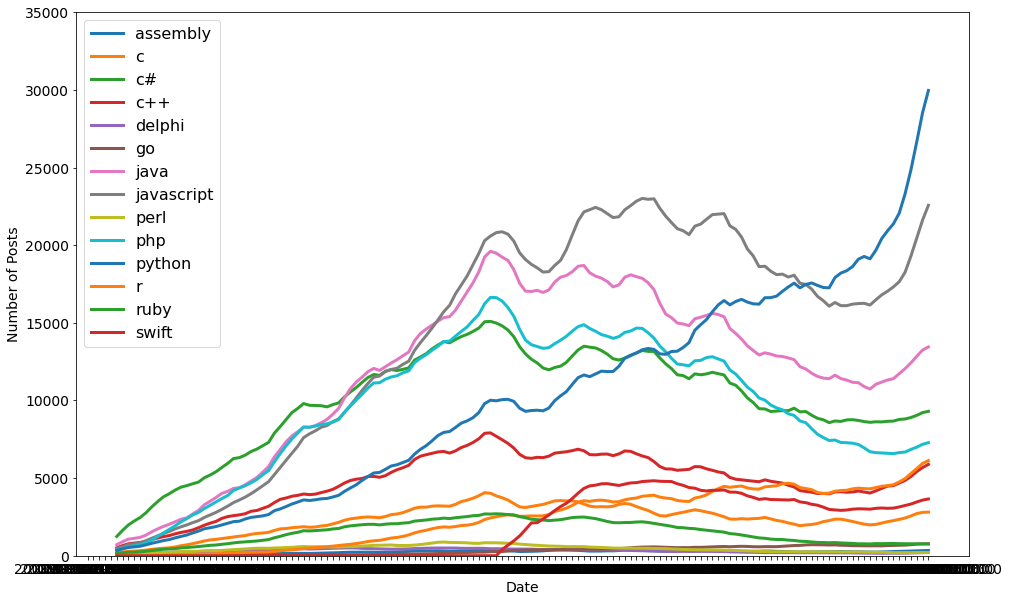

In [36]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

Play with the `window `argument (use 3 or 12) and see how the chart changes!

# Learning Points & Summary

We've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

* used `.groupby()` to explore the number of posts and entries per programming language

* converted strings to Datetime objects with `to_datetime()` for easier plotting

* reshaped our DataFrame by converting categories to columns using `.pivot()`

* used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using `.fillna()`

* created (multiple) line charts using `.plot()` with a for-loop

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a legend to tell apart which line is which by colour

* smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.

